<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve, recall_score
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from tqdm import tqdm

In [2]:
pd.options.display.float_format = "{:,.2f}".format
pd.options.mode.chained_assignment = None

# загружаем данные
df = pd.read_csv('Churn.csv')

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df = df.dropna()
df.isna().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rownumber,"9,091.00",NaN,NaN,NaN,"5,013.91","2,884.43",1.00,"2,521.50","5,019.00","7,511.50","9,999.00"
customerid,"9,091.00",NaN,NaN,NaN,"15,691,053.16","71,614.19","15,565,701.00","15,628,985.50","15,691,061.00","15,752,851.50","15,815,660.00"
surname,9091,2787,Smith,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creditscore,"9,091.00",NaN,NaN,NaN,650.74,96.41,350.00,584.00,652.00,717.00,850.00
geography,9091,3,France,4550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,9091,2,Male,4974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,"9,091.00",NaN,NaN,NaN,38.95,10.56,18.00,32.00,37.00,44.00,92.00
tenure,"9,091.00",NaN,NaN,NaN,5.00,2.89,0.00,2.00,5.00,7.00,10.00
balance,"9,091.00",NaN,NaN,NaN,"76,522.74","62,329.53",0.00,0.00,"97,318.25","127,561.89","250,898.09"
numofproducts,"9,091.00",NaN,NaN,NaN,1.53,0.58,1.00,1.00,1.00,2.00,4.00


In [7]:
df.corr()

/var/folders/1x/1w_zvycx51vgmxmwtzcxw7zr0000gn/T/ipykernel_79820/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
rownumber,1.00,0.00,0.00,0.00,-0.01,-0.01,0.01,0.00,0.01,-0.00,-0.01
customerid,0.00,1.00,-0.00,0.01,-0.02,-0.01,0.01,-0.02,0.00,0.01,-0.01
creditscore,0.00,-0.00,1.00,-0.00,-0.00,0.00,0.01,-0.00,0.03,0.01,-0.02
age,0.00,0.01,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.08,-0.01,0.28
tenure,-0.01,-0.02,-0.00,-0.01,1.00,-0.01,0.01,0.03,-0.03,0.01,-0.02
balance,-0.01,-0.01,0.00,0.03,-0.01,1.00,-0.30,-0.02,-0.00,0.01,0.12
numofproducts,0.01,0.01,0.01,-0.03,0.01,-0.30,1.00,0.01,0.01,0.01,-0.05
hascrcard,0.00,-0.02,-0.00,-0.01,0.03,-0.02,0.01,1.00,-0.01,-0.01,-0.01
isactivemember,0.01,0.00,0.03,0.08,-0.03,-0.00,0.01,-0.01,1.00,-0.02,-0.16
estimatedsalary,-0.00,0.01,0.01,-0.01,0.01,0.01,0.01,-0.01,-0.02,1.00,0.02


In [8]:
df_tree = df.drop('surname', axis=1)
df_tree = pd.get_dummies(df_tree, drop_first=True)

features = df_tree.drop('exited', axis=1)
target = df_tree.exited

features_train, f, target_train, t = train_test_split(features, target,
                                                              test_size=.4,
                                                              random_state=42,
                                                              stratify=target)

features_valid, features_test, target_valid, target_test = train_test_split(f, t,
                                                                            test_size=.5,
                                                                            random_state=42,
                                                                            stratify=t)

In [9]:
print(features_train.shape, target_train.shape)
print(features_valid.shape, target_valid.shape)
print(features_test.shape, target_test.shape)

(5454, 13) (5454,)
(1818, 13) (1818,)
(1819, 13) (1819,)


In [10]:
numeric =  ['customerid', 'creditscore', 'age', 'tenure', 'balance',
            'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

**Вывод** 
- Объекты с пропущенными значениями в столбце `tenure` удалены.
- Из описательной статистике виден явный дисбаланс классов. Среднее значение равное 0.2 в столбце `exited` говорит о превосходстве нулевого класса в выборке.
- Мультиколлинеарность отсутствует.

## Исследование задачи

**Исследуем выборки на сбалансированость**

In [11]:
def balans(df, axes):
    count = df.value_counts(normalize=True)
    count.plot(kind='bar', ax=axes)

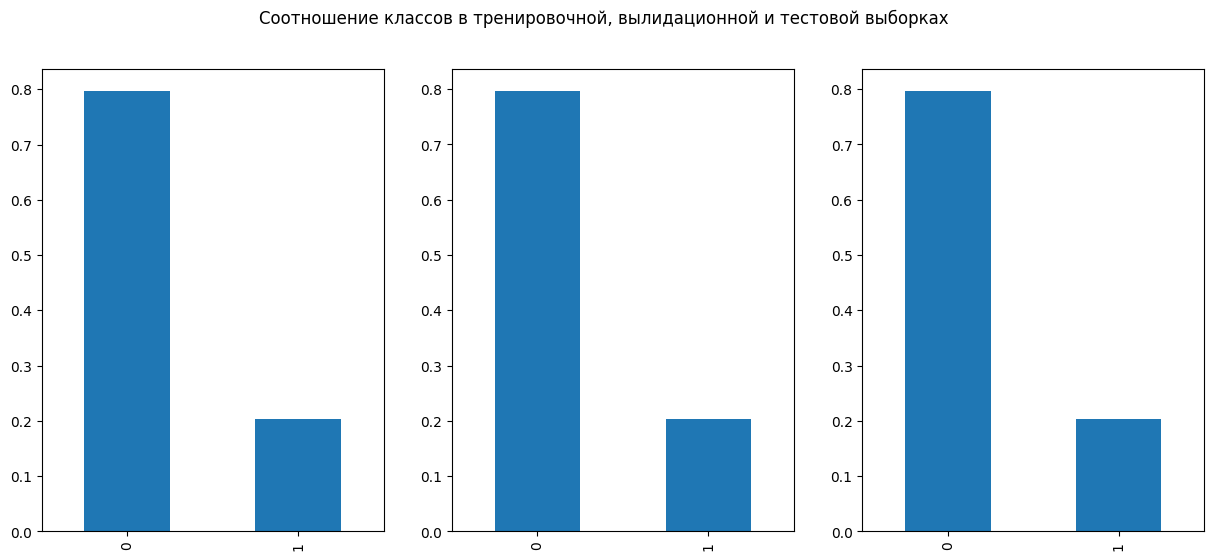

In [12]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
fig.suptitle('Соотношение классов в тренировочной, вылидационной и тестовой выборках')

balans(target_train, axes[0])
balans(target_valid, axes[1])
balans(target_test, axes[2])

**Обучим модели и выберим лучшую по показателю F1-метрики**

In [13]:
# решающее дерево класификаций

model_dt = []
max_depth = 1
f1 = 0

for depth in range (1, 20):
    model = DecisionTreeClassifier(random_state=42, max_depth=depth)
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)
    result = f1_score(target_valid, predicted)
    if result> f1:
        model_dt = model
        max_depth = depth
        f1 = result
        
print('F1-метрика лучшей модели:', f1, 'максимальная глубина дерева:', max_depth)

F1-метрика лучшей модели: 0.5475040257648953 максимальная глубина дерева: 8


In [14]:
# случайный лес

model_rf = []
n_estimators = 1
max_depth = 1
f1 = 0

for n in tqdm(range(1, 30)):
    for depth in range(1, 15):
        model = RandomForestClassifier(random_state=42, n_estimators=n, max_depth=depth)
        model.fit(features_train, target_train)
        predicted = model.predict(features_valid)
        result = f1_score(target_valid, predicted)
        if result>f1:
            model_rf = model
            n_estimators = n
            max_depth = depth
            f1 = result
            
print('F1-метрика лучшей модели:', f1, 'количество деревьев:', n_estimators,
      'максимальная глубина дерева:', max_depth)

100%|██████████| 29/29 [00:23<00:00,  1.26it/s]

F1-метрика лучшей модели: 0.5372050816696914 количество деревьев: 15 максимальная глубина дерева: 11


**Модель Логистическая регрессия**

In [15]:
# подготовка данных

scaler.fit(df[numeric])
df[numeric] = scaler.transform(df[numeric])


encoder = OrdinalEncoder()
df_ordinal = pd.DataFrame(encoder.fit_transform(df), columns=df.columns)
df_ordinal.describe()

features_log = df_ordinal.drop('exited', axis=1)
target_log = df_ordinal.exited

features_log_train, df_1, target_log_train, df_2 = train_test_split(features_log, target_log,
                                                            test_size=.4,
                                                            random_state=42,
                                                            stratify=target)

features_log_valid, features_log_test, target_log_valid, target_log_test = train_test_split(df_1, df_2,
                                                                            test_size=.5,
                                                                            random_state=42,
                                                                            stratify=df_2)

In [16]:
# обучим модель

model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
model.fit(features_log_train, target_log_train)
predicted = model.predict(features_log_valid)
print('F1-метрика:', f1_score(target_log_valid, predicted))

F1-метрика: 0.2386117136659436


**Вывод**
- Данные имеют дисбаланс классов. С учетом этого данные были разделены на тренировочную, валидационную и тестовую выборки с сохранением долей классов.
- Лучшие показатели f1-метрики показала модель решающего дерева с максимальной глубиной дерева 8.
- Худший результат показывает модель логистической регрессии со значением F1-метрики равной 0.27

## Борьба с дисбалансом

**Рассмотрим как изменятся результаты метрик в зависимости от разных способов борьбы с дисбалансом:**
- Увеличим выборки.
- Уменьшим выборки.
- Взвешивание классов.

### Взвешивание классов

#### Решающее дерево

F1-метрика лучшей модели: 0.5997888067581838 максимальная глубина дерева: 7


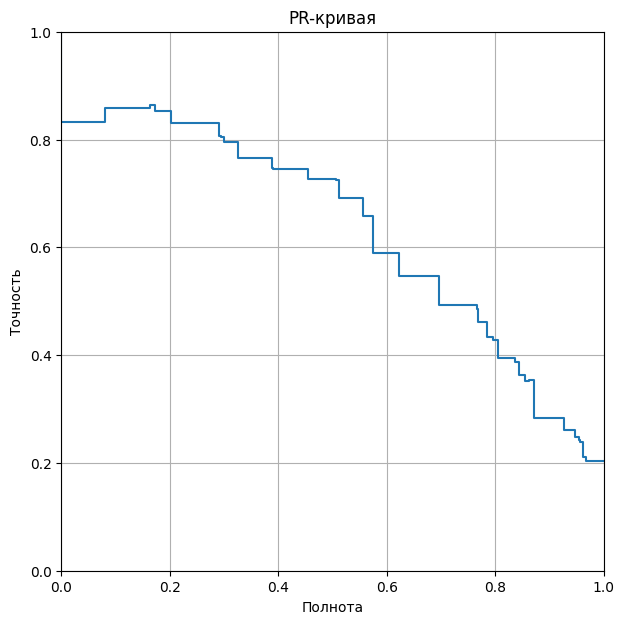

In [17]:
model_dt = []
max_depth = 1
f1 = 0

for depth in range (1, 20):
    model = DecisionTreeClassifier(random_state=42, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted = model.predict(features_valid)
    result = f1_score(target_valid, predicted)
    if result> f1:
        model_dt = model
        max_depth = depth
        f1 = result
        
print('F1-метрика лучшей модели:', f1, 'максимальная глубина дерева:', max_depth)

probabiliti = model_dt.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabiliti[:,1])

plt.figure(figsize=(7,7))
plt.step(recall, precision, where='post')
plt.ylim(0,1)
plt.xlim(0,1)
plt.grid()
plt.ylabel('Точность')
plt.xlabel('Полнота')
plt.title('PR-кривая')
plt.show()

#### Случайный лес

100%|██████████| 29/29 [00:22<00:00,  1.26it/s]

F1-метрика лучшей модели: 0.6403269754768393 количество деревьев: 14 максимальная глубина дерева: 10


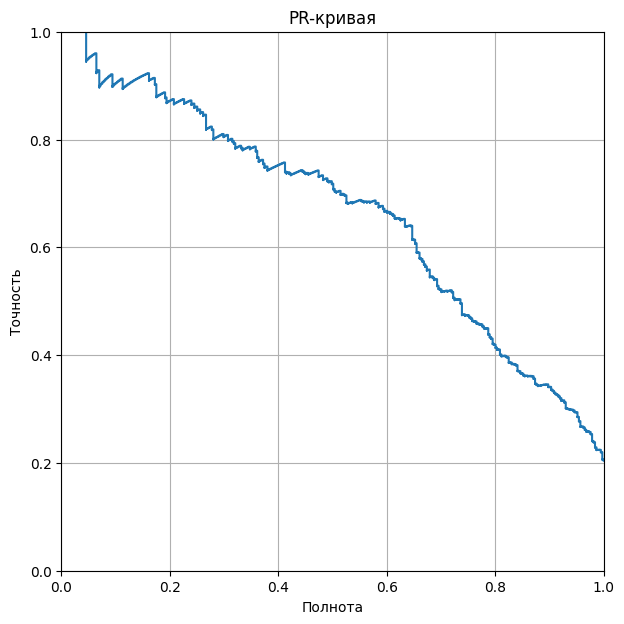

In [18]:
model_rf_w = []
n_estimators = 1
max_depth = 1
f1 = 0

for n in tqdm(range(1, 30)):
    for depth in range(1, 15):
        model = RandomForestClassifier(random_state=42, n_estimators=n, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predicted = model.predict(features_valid)
        result = f1_score(target_valid, predicted)
        if result>f1:
            model_rf_w = model
            n_estimators = n
            max_depth = depth
            f1 = result
            
print('F1-метрика лучшей модели:', f1, 'количество деревьев:', n_estimators,
      'максимальная глубина дерева:', max_depth)

probabiliti = model_rf_w.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabiliti[:,1])

plt.figure(figsize=(7,7))
plt.step(recall, precision, where='post')
plt.ylim(0,1)
plt.xlim(0,1)
plt.grid()
plt.ylabel('Точность')
plt.xlabel('Полнота')
plt.title('PR-кривая')
plt.show()

#### Логистическая регрессия

In [19]:
model_log = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000, class_weight='balanced')
model.fit(features_log_train, target_log_train)
predicted = model.predict(features_log_valid)
print('F1-метрика:', f1_score(target_log_valid, predicted))

F1-метрика: 0.5518394648829431


### Увеличение выборки

In [20]:
# подготовка данных

def upsampled(features, target, repeat, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target ==0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros.sample(random_state=42, frac=fraction)]+
                                   [features_ones] * repeat)
    
    target_upsampled = pd.concat([target_zeros.sample(random_state=42, frac=fraction)]+
                                 [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=42)
    
    return features_upsampled, target_upsampled

In [21]:
features_upsampled, target_upsampled = upsampled(features_train, target_train, 4, 1)

print(features_upsampled.shape)
target_upsampled.value_counts(normalize=True).to_frame()

(8790, 13)


,exited
1,0.51
0,0.49


#### Решающее дерево

F1-метрика лучшей модели: 0.6033755274261603 максимальная глубина дерева: 7


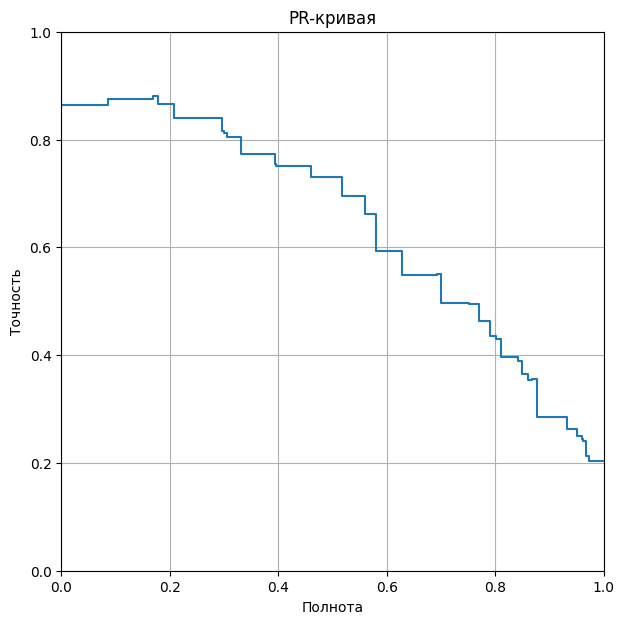

In [22]:
model_dt = []
max_depth = 1
f1 = 0

for depth in range (1, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(features_upsampled, target_upsampled)
    predicted = model.predict(features_valid)
    result = f1_score(target_valid, predicted)
    if result> f1:
        model_dt = model
        max_depth = depth
        f1 = result
        
print('F1-метрика лучшей модели:', f1, 'максимальная глубина дерева:', max_depth)

probabiliti = model_dt.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabiliti[:,1])

plt.figure(figsize=(7,7))
plt.step(recall, precision, where='post')
plt.ylim(0,1)
plt.xlim(0,1)
plt.grid()
plt.ylabel('Точность')
plt.xlabel('Полнота')
plt.title('PR-кривая')
plt.show()

#### Случайный лес

100%|██████████| 29/29 [00:38<00:00,  1.32s/it]

F1-метрика лучшей модели: 0.6170212765957447 количество деревьев: 13 максимальная глубина дерева: 13


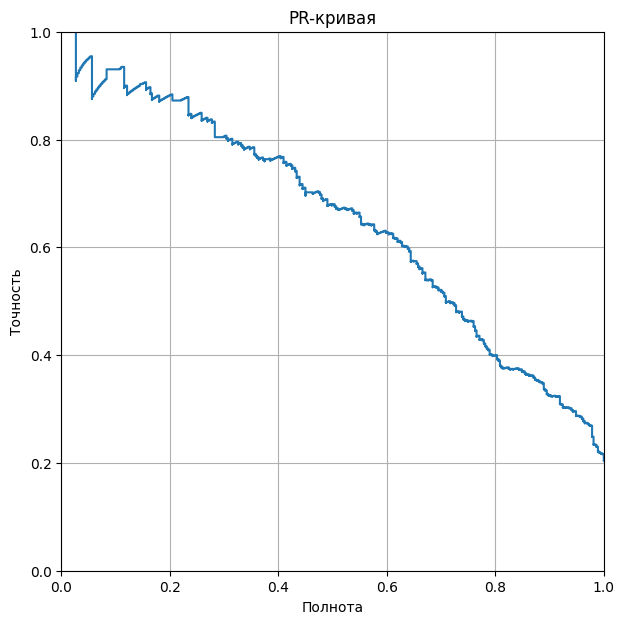

In [23]:
model_rf = []
n_estimators = 1
max_depth = 1
f1 = 0

for n in tqdm(range(1, 30)):
    for depth in range(1, 15):
        model = RandomForestClassifier(random_state=42, n_estimators=n, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predicted = model.predict(features_valid)
        result = f1_score(target_valid, predicted)
        if result>f1:
            model_rf = model
            n_estimators = n
            max_depth = depth
            f1 = result
            
print('F1-метрика лучшей модели:', f1, 'количество деревьев:', n_estimators,
      'максимальная глубина дерева:', max_depth)

probabiliti = model_rf.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabiliti[:,1])

plt.figure(figsize=(7,7))
plt.step(recall, precision, where='post')
plt.ylim(0,1)
plt.xlim(0,1)
plt.grid()
plt.ylabel('Точность')
plt.xlabel('Полнота')
plt.title('PR-кривая')
plt.show()

### Уменьшение выборки

In [24]:
features_upsampled, target_upsampled = upsampled(features_train, target_train,1, 0.26)

print(features_upsampled.shape)
target_upsampled.value_counts(normalize=True).to_frame()

(2241, 13)


,exited
0,0.50
1,0.50


#### Решающее дерево

F1-метрика лучшей модели: 0.5874439461883408 максимальная глубина дерева: 5


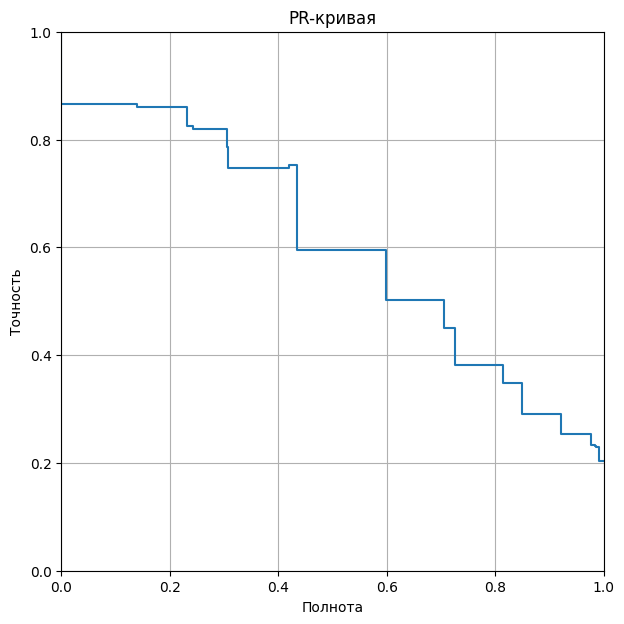

In [25]:
model_dt = []
max_depth = 1
f1 = 0

for depth in range (1, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(features_upsampled, target_upsampled)
    predicted = model.predict(features_valid)
    result = f1_score(target_valid, predicted)
    if result> f1:
        model_dt = model
        max_depth = depth
        f1 = result
        
print('F1-метрика лучшей модели:', f1, 'максимальная глубина дерева:', max_depth)

probabiliti = model_dt.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabiliti[:,1])

plt.figure(figsize=(7,7))
plt.step(recall, precision, where='post')
plt.ylim(0,1)
plt.xlim(0,1)
plt.grid()
plt.ylabel('Точность')
plt.xlabel('Полнота')
plt.title('PR-кривая')
plt.show()

#### Случайный лес

100%|██████████| 29/29 [00:21<00:00,  1.37it/s]


F1-метрика лучшей модели: 0.6000000000000001 количество деревьев: 18 максимальная глубина дерева: 7


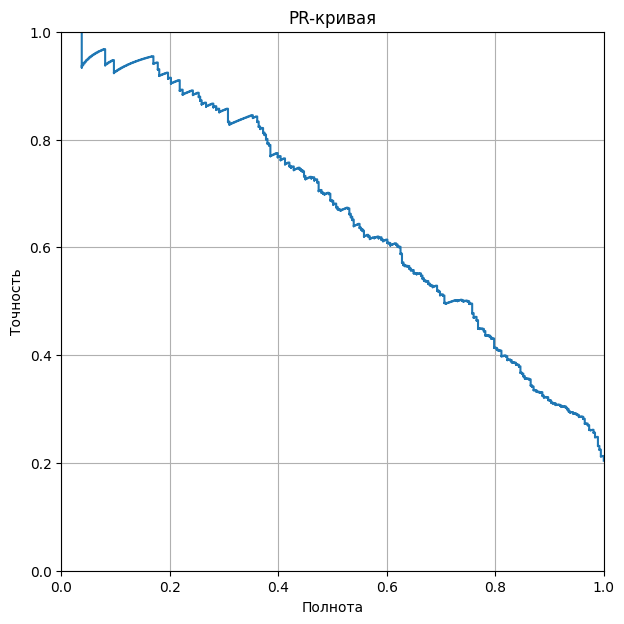

In [26]:
model_rf = []
n_estimators = 1
max_depth = 1
f1 = 0

for n in tqdm(range(1, 30)):
    for depth in range(1, 15):
        model = RandomForestClassifier(random_state=42, n_estimators=n, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predicted = model.predict(features_valid)
        result = f1_score(target_valid, predicted)
        if result>f1:
            model_rf = model
            n_estimators = n
            max_depth = depth
            f1 = result
            
print('F1-метрика лучшей модели:', f1, 'количество деревьев:', n_estimators,
      'максимальная глубина дерева:', max_depth)

probabiliti = model_rf.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabiliti[:,1])

plt.figure(figsize=(7,7))
plt.step(recall, precision, where='post')
plt.ylim(0,1)
plt.xlim(0,1)
plt.grid()
plt.ylabel('Точность')
plt.xlabel('Полнота')
plt.title('PR-кривая')
plt.show()

**Вывод:**
- За счет балансировки удалось повысить показатель метрики F1 на всех моделях.
- Модель логистической регрессии показывает очень низкий результат F1-метрика равна 0.48 с параметром веса классов. В дальнейшем модель изучать нет смысла.
- Модель решающего дерева показывает лучшие результаты F1-метрики на методах увеличения и уменьшения выборки.
- **Лучший результат показывает модель случайного леса при использовании метода взвешивания классов. F1-метрика достигла результата равного 0.62.**

## Тестирование модели

F1-метрика модели: 0.5861601085481681
AUC-ROC-метрика: 0.8466990439457341


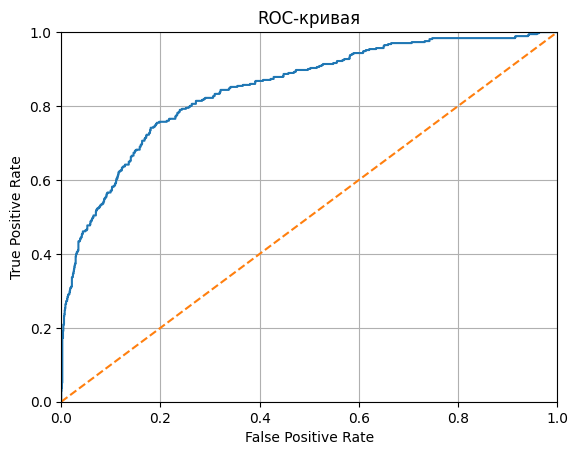

In [27]:
predicted_test = model_rf_w.predict(features_test)

probalilities_test = model_rf_w.predict_proba(features_test)
probabilities_ones = probalilities_test[:, 1]

print('F1-метрика модели:', f1_score(target_test, predicted_test))
print('AUC-ROC-метрика:', roc_auc_score(target_test, probabilities_ones))

fpr, tpr, thresholds = roc_curve(target_test, probabilities_ones)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.grid()
plt.show()

In [28]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
print('F1-метрика константной модели:', f1_score(dummy_model.predict(features_test), target_test))
print('Recall:', recall_score(target_test, predicted_test))

F1-метрика константной модели: 0.33881278538812787
Recall: 0.5822102425876011


- Точность модели при предсказании только первого класса 33%.
- Полнота говорит о том, что модель верно определила 64% истино положительных ответов.

**Вывод**
- Данные имеют выраженный дисбаланс. Интересующий нас класс (факт ухода клиента) это 20% от всего набора данных.
- Без учета дисбаланса модели показывают результат метрики F1 ниже требуемого 0.59.
- При учете дисбаланса и борьбы с ним путем увеличения редкого класса, уменьшения частого класса и взвешивания классов удалось добиться F1-метрики выше 0.59 на моделях случайного леса и решающего дерева.
- PR-кривая на обеих моделях показывает то, что точность моделей при низкой полноте высокая, но с увеличением полноты точность уменьшается. Это говорит о том, что модели хорошо предсказывают редкий класс, особенно модель случайного леса.
- **Лучший результат метрики F1(0.64) у модели случайного леса с использованием параметра взвешивания классов, глудины дерева равным 10 и количеством деревьев 14.**
- AUC-ROC-метрика показывает площадь под ROC-кривой и чем больше этот показатель тем точней модель предсказывает редкий класс. При этом на графике видно, что у выбранной модели показатель истиноположительных ответов равный 0.8 достигается при показателе ложноположительных ответах равном примерно 0.3